In [3]:
!pip install wordcloud
!pip install gensim
!pip install pywaffle
!pip install keras
!pip install tensorflow

  Created wheel for smart-open: filename=smart_open-3.0.0-py3-none-any.whl size=107102 sha256=63458f98df0c5bbf0c384a44e9a851a450b349b1c3091357ea1290874f2e396f
  Stored in directory: c:\users\adxva\appdata\local\pip\cache\wheels\11\73\9a\f91ac1f1816436b16423617c5be5db048697ff152a9c4346f2
Successfully built smart-open
  Attempting uninstall: Cython
    Found existing installation: Cython 0.29.21
    Uninstalling Cython-0.29.21:
      Successfully uninstalled Cython-0.29.21
  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4835 sha256=16c9e13cc60502b4708f32e6f5a3b1d40b6a69538529654406803852dc003eb8
  Stored in directory: c:\users\adxva\appdata\local\pip\cache\wheels\a0\16\9c\5473df82468f958445479c59e784896fa24f4a5fc024b0f501
Successfully built termcolor


In [4]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from IPython.display import display
import base64
import string
import re
from collections import Counter
from time import time
# from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS as stopwords
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt
from pywaffle import Waffle

from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation

In [23]:
import nltk

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
from nltk.collocations import *
try:
    stopwords = set(stopwords.words('english'))
except LookupError:
    import nltk
    nltk.download('stopwords')
    stopwords = set(stopwords.words('english'))
#stopwords

In [11]:
with open(r'C:\Users\adxva\OneDrive\Bureau\ENSAE 2A - S1\Harry-Python\Data\Harry Potter and the Sorcerer.txt', 'r') as infile, open(r'C:\Users\adxva\OneDrive\Bureau\ENSAE 2A - S1\Harry-Python\Data\HP1.csv', 'w') as outfile:
        stripped = (line.strip() for line in infile)
        lines = (line.split(",") for line in stripped if line)
        writer = csv.writer(outfile)
        writer.writerows(lines)

In [15]:
data = pd.read_csv(r'C:\Users\adxva\OneDrive\Bureau\ENSAE 2A - S1\Harry-Python\Data\HP1.csv', sep='delimiter', header=None)
data.head(100)

<ipython-input-15-9293ae4bb241>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  data = pd.read_csv(r'C:\Users\adxva\OneDrive\Bureau\ENSAE 2A - S1\Harry-Python\Data\HP1.csv', sep='delimiter', header=None)


,0
0,Harry Potter and the Sorcerer's Stone
1,CHAPTER ONE
2,THE BOY WHO LIVED
3,"Mr. and Mrs. Dursley, of number four, Privet D..."
4,Mr. Dursley was the director of a firm called ...
...,...
95,"""""""You think it -- wise -- to trust Hagrid wit..."
96,"I would trust Hagrid with my life,"""""" said Dum..."
97,"""""""I'm not saying his heart isn't in the right..."
98,A low rumbling sound had broken the silence ar...


In [16]:
# Combine all training text into one large string
all_text = ' '.join([text for text in data[0]])
print('Number of words in all_text:', len(all_text))

Number of words in all_text: 448356


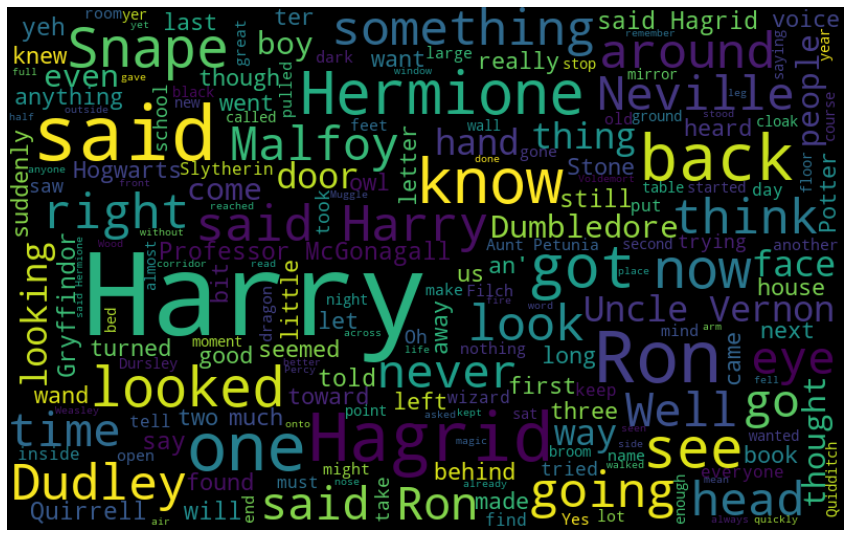

In [17]:
# Word cloud for entire training dataset
# default width=400, height=200

wordcloud = WordCloud(width=800, height=500,
                      random_state=21, max_font_size=110).generate(all_text)
plt.figure(figsize=(15, 12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off');

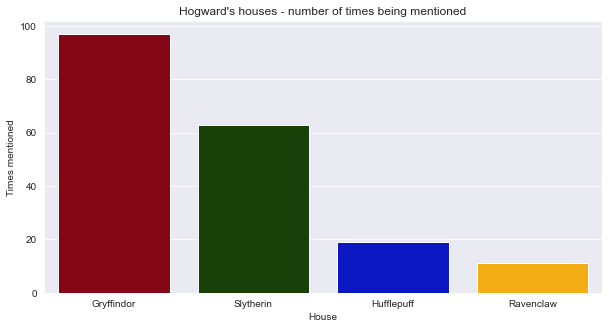

In [21]:
Slytherin = all_text.count("Slytherin")
Gryffindor = all_text.count("Gryffindor")
Hufflepuff = all_text.count("Hufflepuff")
Ravenclaw = all_text.count("Ravenclaw")
house_list = [['Gryffindor', Gryffindor], ['Slytherin', Slytherin], ['Hufflepuff', Hufflepuff], ['Ravenclaw', Ravenclaw]]
df_house= pd.DataFrame(house_list, columns=['House', 'Times mentioned'])
colors = ["crimson", "forrest green", "true blue", "amber"]
sns.set_style("darkgrid")
plt.figure(figsize=(10, 5))
with sns.xkcd_palette(colors):
    sns.barplot(x="House", y="Times mentioned", saturation=0.9, data=df_house).set_title("Hogward's houses - number of times being mentioned")

In [27]:
#tokenisation pour avoir un texte "clean"
#nltk.download('punkt')
text_list = nltk.tokenize.word_tokenize(all_text)
text_list = [x.lower() for x in text_list]

# ensuite, on enlève les stopswords qui sont les mots comme if, then, the, and ... ainsi que la ponctuation

text_clean = [w.lower() for w in text_list if w not in stopwords and w.isalpha()]
text_clean = ' '.join(text.lower() for text in text_clean)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\adxva\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


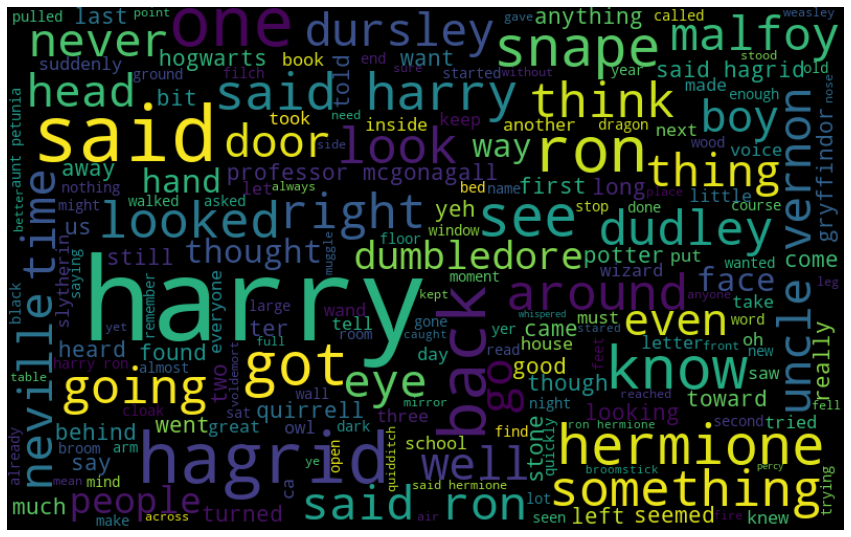

In [30]:
wordcloud = WordCloud(width=800, height=500,
                      random_state=21, max_font_size=110).generate(text_clean)
plt.figure(figsize=(15, 12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off');

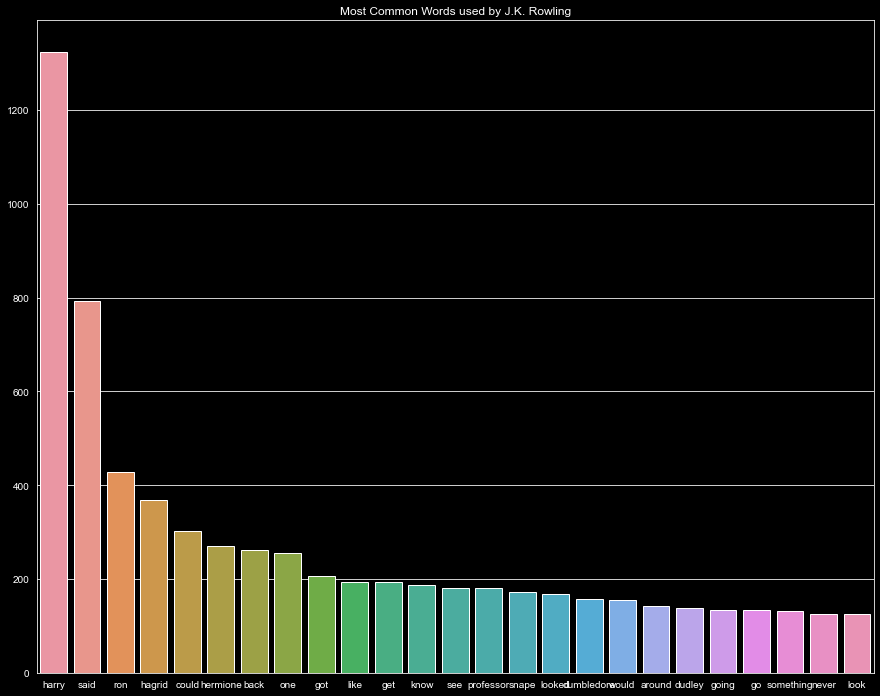

In [34]:
text_clean_list = text_clean.split()
text_counts = Counter(text_clean_list)
text_common_words = [word[0] for word in text_counts.most_common(25)]
text_common_counts = [word[1] for word in text_counts.most_common(25)]

plt.style.use('dark_background')
plt.figure(figsize=(15, 12))

sns.barplot(x=text_common_words, y=text_common_counts)
plt.title('Most Common Words used by J.K. Rowling');

In [ ]:
tralalilala